In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, curvedsky, tools_lens, tools_delens, tools_multitracer
from matplotlib.pyplot import *

In [2]:
snmin, snmax = 1, 100
olmax = 1024
klist = ['comb']

In [3]:
d = prjlib.data_directory()
dobj = {}
for ntype in ['base','goal']:
    p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=ntype+'_roll50')
    pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype+'_roll50')
    qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
    dobj[ntype] = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr='none',elmin=50)

{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}
{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}


In [5]:
r = {}
for ntype in ['base','goal']:
    r[ntype] = 0
    for i in range(snmin,snmax+1):
        BB, TT, BT = np.loadtxt(dobj[ntype].cl['comb'][i],unpack=True)
        r[ntype] += BT**2/BB/TT/(snmax-snmin+1)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


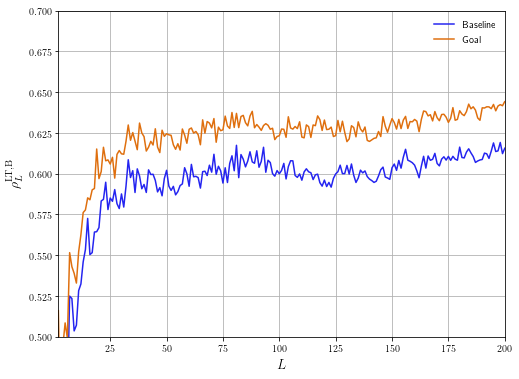

In [8]:
pl.plot_1dstyle(usetex=True,fsize=[8,6],xmin=2,xmax=200,ymin=.5,ymax=.7,grid=True,ylab=r'$\rho_L^{\rm LT,B}$')
plot(r['base'],label='Baseline')
plot(r['goal'],label='Goal')
legend(loc=0)
savefig('fig_BB_correlation.pdf')